# Projekt - Web Scraping - Flygresor.se 

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

import pymysql
pymysql.install_as_MySQLdb()
import sqlalchemy

In [5]:
# hämtar url-kod och scrapar, hemsidan från flygdestinationer, datum, pris och flygplatser

url = 'https://www.flygresor.se/'

html = requests.get(url).content

soup = BeautifulSoup(html, 'lxml')

flight = [i['href'] for i in soup.select('a.cheapestDestinations__link',href =True)]


In [6]:
# slår ihop url-länken med alla destinationer
links = [url+i for i in flight]

In [7]:
# skapar 5 stycken tomma listor

lst1 = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []

# fyller med information för out-, inbounddate, price, airport, samt länk
for i in links:
    html = requests.get(i).content
    soup = BeautifulSoup(html)
    outb = [i.text for i in soup.select("div tr a.outbound-date")]
    lst1.append(outb)
    inb = [i.text for i in soup.select("div tr a.inbound-date")]
    lst2.append(inb)
    price = [i.text for i in soup.select("div tr a.price")]
    lst3.append(price)
    airp = [i.text.strip('\n ') for i in soup.select('div tr a.airports')]
    lst4.append(airp)
    lenk = [i['href'] for i in soup.select('a.price')]
    lst5.append(lenk)

In [8]:
# printar längden för resp lista
print(len(lst1))
print(len(lst2))
print(len(lst3))
print(len(lst4))
print(len(lst5))

30
30
30
30
30


In [15]:
lst1 = [j for i in lst1 for j in i] 
lst2 = [j for i in lst2 for j in i] 
lst3 = [j for i in lst3 for j in i] 
lst4 = [j for i in lst4 for j in i] 
lst5 = [j for i in lst5 for j in i] 

In [17]:
# lägger till url till länkar för resp. lista 
lst5 = ['https://www.flygresor.se'+i for i in lst5]

In [19]:
# kopplar namn till listor 
dct = {"Outbound":lst1, "Inbound":lst2,"Price":lst3, "Airports":lst4, "Links": lst5}

In [20]:
# skapar df
df = pd.DataFrame(dct)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Outbound  6638 non-null   object
 1   Inbound   6638 non-null   object
 2   Price     6638 non-null   object
 3   Airports  6638 non-null   object
 4   Links     6638 non-null   object
dtypes: object(5)
memory usage: 259.4+ KB


In [22]:
# printar data frame 

df.head()

,Outbound,Inbound,Price,Airports,Links
0,2020-09-13,2020-09-24,327 kr,(VST - AGP),https://www.flygresor.se/showresult.php?id=628...
1,2020-09-09,2020-09-24,335 kr,(VST - AGP),https://www.flygresor.se/showresult.php?id=628...
2,2020-09-17,2020-09-20,358 kr,(NYO - AGP),https://www.flygresor.se/showresult.php?id=628...
3,2020-09-22,2020-10-01,375 kr,(NYO - AGP),https://www.flygresor.se/showresult.php?id=628...
4,2020-09-26,2020-10-01,375 kr,(NYO - AGP),https://www.flygresor.se/showresult.php?id=628...


In [75]:
# kollar alla destinationskombinationer

df.Airports.unique()

array(['(VST - STN)', '(NYO - STN)', '(ARN - LGW)', '(ARN - LHR)',
       '(GOT - STN)', '(GOT - LGW)', '(GOT - LHR)', '(CPH - STN)',
       '(CPH - LTN)', '(CPH - LHR)', '(MMX - LHR)', '(CPH - LGW)',
       '(NYO - AGP)', '(VST - AGP)', '(ARN - AGP)', '(GOT - AGP)',
       '(CPH - AGP)', '(MMX - AGP)', '(NYO - GDN)', '(ARN - GDN)',
       '(GOT - GDN)', '(MMX - GDN)', '(CPH - GDN)', '(ARN - BCN)',
       '(GOT - BCN)', '(CPH - BCN)', '(MMX - BCN)', '(NYO - BEG)',
       '(ARN - BEG)', '(GOT - BEG)', '(MMX - BEG)', '(CPH - BEG)',
       '(ARN - TXL)', '(ARN - SXF)', '(GOT - TXL)', '(GOT - SXF)',
       '(CPH - TXL)', '(CPH - SXF)', '(ARN - KRK)', '(NYO - KRK)',
       '(GOT - KRK)', '(MMX - KRK)', '(CPH - KRK)', '(ARN - PMI)',
       '(GOT - PMI)', '(CPH - PMI)', '(MMX - PMI)', '(ARN - AMS)',
       '(GOT - AMS)', '(CPH - AMS)', '(MMX - AMS)', '(ARN - VNO)',
       '(GOT - VNO)', '(CPH - VNO)', '(MMX - VNO)', '(NYO - BGY)',
       '(ARN - MXP)', '(ARN - BGY)', '(ARN - LIN)', '(GOT - BG

In [76]:
# stippar bort bindestrecken mellan alla kombinationer

df.Airports.str.strip().str.split("-")

0       [(VST ,  STN)]
1       [(NYO ,  STN)]
2       [(NYO ,  STN)]
3       [(NYO ,  STN)]
4       [(NYO ,  STN)]
             ...      
7002    [(MMX ,  KRK)]
7003    [(CPH ,  KRK)]
7004    [(MMX ,  KRK)]
7005    [(CPH ,  KRK)]
7006    [(MMX ,  KRK)]
Name: Airports, Length: 7007, dtype: object

In [65]:
# lägger till datetime

df["Outbound"] = pd.to_datetime(df["Outbound"])
df["Inbound"] = pd.to_datetime(df["Inbound"])

In [24]:
# replacear kr och mellanslag

df.Price = df.Price.str.replace("kr", "").str.replace(" ", "")

In [25]:
# gör om price till en integer

df.Price = df.Price.astype("int")

In [26]:
# droppar null values kolumn

df.Airports.dropna(inplace = True) 

# ny dataframe med slittade value kolumn

new = df["Airports"].str.split("-", n=1, expand = True)

# ny daprture kolumn

df["Departure"]= new[0]

# new "Arrival" kolumn

df["Arrival"]= new[1] 

# droppar gammal kolumn

df.drop(columns =["Airports"], inplace = True)

In [27]:
# tar bort (  and strippar

df.Departure = df.Departure.str.replace('(','').str.strip()

# tar bort )  and strippar

df.Arrival = df.Arrival.str.replace(')','').str.strip()

In [28]:
df.head()

,Outbound,Inbound,Price,Links,Departure,Arrival
0,2020-09-13,2020-09-24,327,https://www.flygresor.se/showresult.php?id=628...,VST,AGP
1,2020-09-09,2020-09-24,335,https://www.flygresor.se/showresult.php?id=628...,VST,AGP
2,2020-09-17,2020-09-20,358,https://www.flygresor.se/showresult.php?id=628...,NYO,AGP
3,2020-09-22,2020-10-01,375,https://www.flygresor.se/showresult.php?id=628...,NYO,AGP
4,2020-09-26,2020-10-01,375,https://www.flygresor.se/showresult.php?id=628...,NYO,AGP


In [29]:
# kollar unika destiantioner för departure

df.Departure.unique()

array(['VST', 'NYO', 'ARN', 'GOT', 'CPH', 'MMX', 'BMA'], dtype=object)

In [31]:
# kollar unika destiantioner för Arrival

df.Arrival.unique()

array(['AGP', 'STN', 'LGW', 'LHR', 'LTN', 'BGY', 'MXP', 'LIN', 'WMI',
       'WAW', 'TXL', 'SXF', 'ALC', 'CPH', 'GDN', 'RIX', 'TLL', 'PSA',
       'BCN', 'PMI', 'BNX', 'SAW', 'IST', 'OTP', 'DUB', 'INI', 'BMA',
       'ARN', 'MAD', 'KRK'], dtype=object)

In [32]:
# hämtar url-kod och scrapar, hemsidan från flyplatskoder, land samt stad


url3 = "https://www.ccra.com/airport-codes/"
html = requests.get(url3).content
soup = BeautifulSoup(html)

#"div#tablepress-40_wrapper"

In [33]:
# skapar kolumner för city, country och abbrevation

city = [i.text for i in soup.select("td.column-1")]
country = [i.text for i in soup.select("td.column-2")]
abb = [i.text for i in soup.select("td.column-3")]

In [34]:
# namnger kolumner till city, country och abbrevation

dct = {"City":city,"Country":country,"Abbrevation":abb}

In [35]:
# skapar data frame 

df1 = pd.DataFrame(dct)

In [36]:
df1.head()

,City,Country,Abbrevation
0,Aalborg,Denmark,AAL
1,Aalesund,Norway,AES
2,Aarhus,Denmark,AAR
3,"Abbotsford, BC",Canada,YXX
4,"Abbotsford, BC",Canada,YXX


In [37]:
# skapar dataframe 2 genom att: 
# slår ihop dataframe med dataframe 1 på departure och abbrevation

df2= df.merge(df1, how = 'inner', left_on='Departure', right_on='Abbrevation')
df2.head()

,Outbound,Inbound,Price,Links,Departure,Arrival,City,Country,Abbrevation
0,2020-09-13,2020-09-24,327,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
1,2020-09-09,2020-09-24,335,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
2,2020-09-13,2020-09-24,327,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
3,2020-09-09,2020-09-24,335,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
4,2020-10-14,2020-10-22,377,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST


In [38]:
df2

,Outbound,Inbound,Price,Links,Departure,Arrival,City,Country,Abbrevation
0,2020-09-13,2020-09-24,327,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
1,2020-09-09,2020-09-24,335,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
2,2020-09-13,2020-09-24,327,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
3,2020-09-09,2020-09-24,335,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
4,2020-10-14,2020-10-22,377,https://www.flygresor.se/showresult.php?id=628...,VST,AGP,Vasteras,Sweden,VST
...,...,...,...,...,...,...,...,...,...
5980,2021-02-02,2021-02-07,7544,https://www.flygresor.se/showresult.php?id=628...,MMX,ALC,Malmo,Sweden,MMX
5981,2021-02-01,2021-02-08,7780,https://www.flygresor.se/showresult.php?id=628...,MMX,ALC,Malmo,Sweden,MMX
5982,2021-02-01,2021-02-07,7923,https://www.flygresor.se/showresult.php?id=628...,MMX,ALC,Malmo,Sweden,MMX
5983,2021-02-02,2021-02-04,14638,https://www.flygresor.se/showresult.php?id=628...,MMX,ALC,Malmo,Sweden,MMX


In [39]:
# byter name på kolumner connectade till departure
df2.rename(columns={'City':'Dept_City','Country':'Dept_Country'}, inplace= True)

In [40]:
# droppar kolumnen Abbrevation 
df2.drop(columns=['Abbrevation'], inplace=True)

In [41]:
# slår ihop df1 på arrival, kolumn på df2
df2 = df2.merge(df1, how = 'inner', left_on='Arrival', right_on='Abbrevation')

In [42]:
# byter namn på kolumner connectade till "Arrival"
df2.rename(columns={'City':'Arr_City','Country':'Arr_Country'}, inplace= True)

In [43]:
# dropping kolumnen "Abbrevation" 
df2.drop(columns=['Abbrevation'], inplace=True)

In [44]:
df2.columns.tolist()

['Outbound',
 'Inbound',
 'Price',
 'Links',
 'Departure',
 'Arrival',
 'Dept_City',
 'Dept_Country',
 'Arr_City',
 'Arr_Country']

In [45]:
# byter ordning on the kolumnerna

df2 = df2[['Outbound', 'Inbound','Price',
           'Departure','Dept_City','Dept_Country',
           'Arrival','Arr_City','Arr_Country','Links']] 

In [46]:
df2.Departure.unique()

array(['VST', 'ARN', 'GOT', 'CPH', 'MMX', 'BMA'], dtype=object)

# Analyserar färdig dataframe 

In [52]:
import matplotlib.pyplot as plt

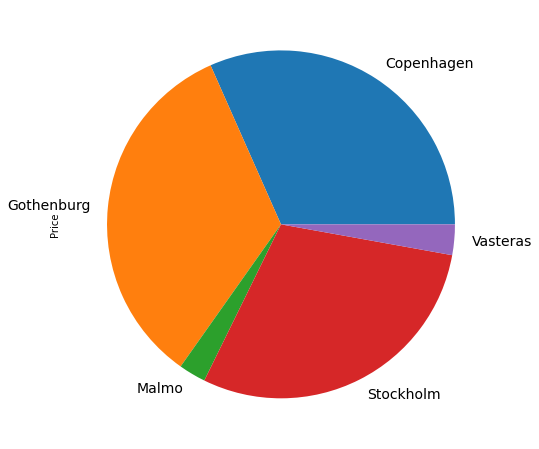

In [53]:
# Antal flyg från respektive destination 

Dc_antal_f = df2.groupby(['Dept_City'])[['Price']].count()
Dc_antal_f.Price.plot(kind='pie', figsize=(12,8), fontsize =14)

In [48]:
df2.groupby(['Dept_City'])[["Price"]].count().sort_values(by="Price", ascending=False).head()

,Price
Dept_City,
Gothenburg,1918
Copenhagen,1807
Stockholm,1681
Vasteras,162
Malmo,144


In [49]:
df2.loc[:, ['Price','Dept_City']].max()

Price           44435
Dept_City    Vasteras
dtype: object

In [50]:
df2.loc[:, ['Price','Dept_City']].min()

Price                71
Dept_City    Copenhagen
dtype: object

In [51]:
df2.describe()

,Price
count,5712.000000
mean,1604.809174
std,1862.396864
min,71.000000
25%,727.000000
50%,1041.000000
75%,1602.000000
max,44435.000000


In [54]:
# Tar fram topp 20 resorna med lägst pris

df2.Price.nsmallest(n=20).index

Int64Index([3587, 3588, 3597, 3598, 3589, 3599, 3590, 3591, 3592, 3600, 3601,
            3602, 1062, 1063, 1065, 1066, 1091, 1092, 1094, 1095],
           dtype='int64')

In [56]:
df2.iloc[[3587, 3588, 3597, 3598, 3589, 3599, 3590, 3591, 3592, 3600, 3601,
            3602, 1062, 1063, 1065, 1066, 1091, 1092, 1094, 1095]]

,Outbound,Inbound,Price,Departure,Dept_City,Dept_Country,Arrival,Arr_City,Arr_Country,Links
3587,2020-10-16,2020-10-18,71,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3588,2020-10-16,2020-10-18,71,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3597,2020-10-16,2020-10-18,71,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3598,2020-10-16,2020-10-18,71,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3589,2020-10-23,2020-10-25,76,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3599,2020-10-23,2020-10-25,76,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3590,2020-10-16,2020-10-18,94,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3591,2020-10-09,2020-10-11,94,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3592,2020-10-23,2020-10-26,94,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...
3600,2020-10-16,2020-10-18,94,GOT,Gothenburg,Sweden,GDN,Gdansk,Poland,https://www.flygresor.se/showresult.php?id=628...


In [57]:
# tar fram topp 20 dyraste resorna

df2.Price.nlargest(n=20).index

Int64Index([4675, 4676, 4674, 4526, 4663, 4525, 2265, 2270, 4524, 3454, 3455,
            4639, 4511, 5003, 2139, 2260, 4761, 4762, 4763, 4760],
           dtype='int64')

In [58]:
df2.iloc[[4675, 4676, 4674, 4526, 4663, 4525, 2265, 2270, 4524, 3454, 3455,
            4639, 4511, 5003, 2139, 2260, 4761, 4762, 4763, 4760]]

,Outbound,Inbound,Price,Departure,Dept_City,Dept_Country,Arrival,Arr_City,Arr_Country,Links
4675,2021-04-04,2021-04-30,44435,CPH,Copenhagen,Denmark,SAW,Istanbul,Turkey,https://www.flygresor.se/showresult.php?id=628...
4676,2021-04-04,2021-04-30,44435,CPH,Copenhagen,Denmark,SAW,Istanbul,Turkey,https://www.flygresor.se/showresult.php?id=628...
4674,2021-05-01,2021-05-30,21048,CPH,Copenhagen,Denmark,SAW,Istanbul,Turkey,https://www.flygresor.se/showresult.php?id=628...
4526,2021-05-11,2021-05-18,17194,GOT,Gothenburg,Sweden,PMI,"Palma, Mallorca",Spain,https://www.flygresor.se/showresult.php?id=628...
4663,2021-04-19,2021-04-30,16499,ARN,Stockholm,Sweden,SAW,Istanbul,Turkey,https://www.flygresor.se/showresult.php?id=628...
4525,2021-05-12,2021-05-15,14832,GOT,Gothenburg,Sweden,PMI,"Palma, Mallorca",Spain,https://www.flygresor.se/showresult.php?id=628...
2265,2021-02-02,2021-02-04,14638,MMX,Malmo,Sweden,ALC,Alicante,Spain,https://www.flygresor.se/showresult.php?id=628...
2270,2021-02-02,2021-02-04,14638,MMX,Malmo,Sweden,ALC,Alicante,Spain,https://www.flygresor.se/showresult.php?id=628...
4524,2021-05-10,2021-05-17,14411,GOT,Gothenburg,Sweden,PMI,"Palma, Mallorca",Spain,https://www.flygresor.se/showresult.php?id=628...
3454,2021-01-04,2021-01-11,14241,GOT,Gothenburg,Sweden,SXF,Berlin,Germany,https://www.flygresor.se/showresult.php?id=628...


In [59]:
# Tar fram genomsnittligt pris till respektive slutdestination 

AC_p = df2.groupby("Arr_City")[["Price"]].mean().sort_values(by="Price",ascending=True)

Text(0, 0.5, 'Price')

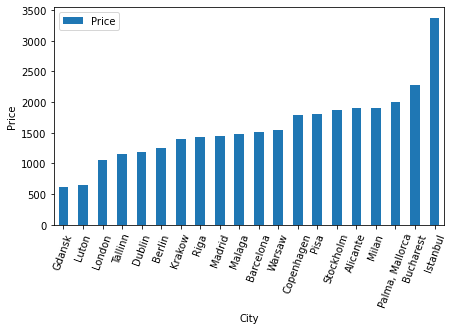

In [60]:
AC_p.plot(kind='bar', figsize=(7,4),rot=70)
plt.xlabel('City',fontsize=10)
plt.ylabel('Price',fontsize=10)

In [61]:
# Genomsnittligt pris från respektive avreseort

Dc_p = df2.groupby("Dept_City")[["Price"]].mean().sort_values(by="Price", ascending=True)

Text(0, 0.5, 'Mean price')

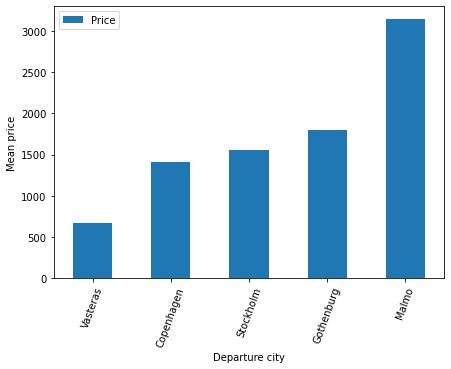

In [62]:
Dc_p.plot(kind='bar', figsize=(7,5),rot=70)
plt.xlabel('Departure city',fontsize=10)
plt.ylabel('Mean price',fontsize=10)

In [67]:
# Genomsnittligt pris från sverige respektive danmark 

df2.groupby("Dept_Country")[["Price"]].mean().sort_values(by="Price")

,Price
Dept_Country,
Denmark,1412.677366
Sweden,1693.716261


In [79]:
# Antal för vald stad 
df2.groupby(['Dept_Country','Dept_City'])[['Price']].count().head(60)

Price
Dept_Country Dept_City        
Denmark      Copenhagen   1807
Sweden       Gothenburg   1918
             Malmo         144
             Stockholm    1681
             Vasteras      162

In [68]:
# Listar alla destinationer

df2.Arr_City.unique().tolist()

['Malaga',
 'London',
 'Alicante',
 'Milan',
 'Warsaw',
 'Berlin',
 'Copenhagen',
 'Gdansk',
 'Riga',
 'Tallinn',
 'Pisa',
 'Barcelona',
 'Palma, Mallorca',
 'Istanbul',
 'Bucharest',
 'Dublin',
 'Madrid',
 'Krakow',
 'Stockholm',
 'Luton']

In [69]:
# Unika destinationer till list
cities = df2.Arr_City.unique().tolist()

In [70]:
# Maskera df på Arr_City
lon = df2['Arr_City'] == 'London'
bar = df2['Arr_City'] == 'Barcelona'
ber = df2['Arr_City'] == 'Berlin'
ams = df2['Arr_City'] == 'Amsterdam'
mil = df2['Arr_City'] == 'Milan'
dub = df2['Arr_City'] == 'Dublin'

In [71]:
# Skapa df baserat på destinationer
london = df2.loc[lon]
barcelona = df2.loc[bar]
berlin = df2.loc[ber]
amsterdam = df2.loc[ams]
milan = df2.loc[mil]
dublin = df2.loc[dub]

In [72]:
i1 = london.Price.nsmallest(n=10).index.tolist()
i2 = barcelona.Price.nsmallest(n=10).index.tolist()
i3 = berlin.Price.nsmallest(n=10).index.tolist()
i4 = amsterdam.Price.nsmallest(n=10).index.tolist()
i5 = milan.Price.nsmallest(n=10).index.tolist()
i6 = dublin.Price.nsmallest(n=10).index.tolist()

In [73]:
df2.columns.tolist()

['Outbound',
 'Inbound',
 'Price',
 'Departure',
 'Dept_City',
 'Dept_Country',
 'Arrival',
 'Arr_City',
 'Arr_Country',
 'Links']

In [74]:
# Kan välja valfritt (i), alltså stad får fram billigast resa

df2.loc[i3][['Outbound','Inbound','Price','Departure',
'Dept_City','Arr_City','Arr_Country',]]

,Outbound,Inbound,Price,Departure,Dept_City,Arr_City,Arr_Country
3362,2020-10-23,2020-10-25,620,CPH,Copenhagen,Berlin,Germany
3372,2020-10-23,2020-10-25,620,CPH,Copenhagen,Berlin,Germany
3406,2020-10-23,2020-10-25,620,CPH,Copenhagen,Berlin,Germany
3416,2020-10-23,2020-10-25,620,CPH,Copenhagen,Berlin,Germany
3154,2020-11-05,2020-11-10,629,ARN,Stockholm,Berlin,Germany
3155,2020-11-06,2020-11-14,629,ARN,Stockholm,Berlin,Germany
3156,2020-11-06,2020-11-13,629,ARN,Stockholm,Berlin,Germany
3157,2020-11-07,2020-11-13,629,ARN,Stockholm,Berlin,Germany
3158,2020-11-06,2020-11-11,629,ARN,Stockholm,Berlin,Germany
3159,2020-11-07,2020-11-14,629,ARN,Stockholm,Berlin,Germany


In [78]:
# Genomsnittligt pris från respektive avresort 

df2.groupby ('Dept_City')[['Price']].mean().head()

,Price
Dept_City,
Copenhagen,1412.677366
Gothenburg,1796.738269
Malmo,3142.916667
Stockholm,1550.556811
Vasteras,671.308642


In [80]:
df2.groupby(['Dept_City'])[["Price"]].count().sort_values(by="Price", ascending=False).head()

,Price
Dept_City,
Gothenburg,1918
Copenhagen,1807
Stockholm,1681
Vasteras,162
Malmo,144


In [81]:
#Sparar ner i CSV-fil

df2.to_csv("project_webscraping_flyresor.csv")